In [1]:
# Preamble
from astropy.table import Table, column
import numpy as np
import os

%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
# better-looking plots
plt.rcParams['font.family'] = 'serif'
plt.rcParams['figure.figsize'] = (10.0, 8)
plt.rcParams['font.size'] = 18
mpl.ticker.AutoLocator.default_params['nbins'] = 5
mpl.ticker.AutoLocator.default_params['prune'] = 'both'

mpl.rcParams['ps.useafm'] = True
mpl.rcParams['pdf.use14corefonts'] = True
mpl.rcParams['text.usetex'] = True

import sys
sys.path.append('../astro_codes/')

In [4]:
sparcfire_samples = Table.read('../fits/sparcfire/sparcfire_samples.fits')
sparcfire = Table.read('../fits/sparcfire/pitch_angles.fits')
mendel_masses = Table.read('../fits/Simard+Mendel/mendel_masses.fits')
samples = Table.read('../fits/SF_fits/samples.fits')

ok_P = sparcfire['P'] > 0

spiral_sample = np.all([sparcfire_samples['in_sparcfire'],sparcfire_samples['axial_ok'],
                        sparcfire_samples['in_mass_limit'],sparcfire_samples['in_spiral'],
                        ok_P],axis=0)

print('{} spiral galaxies in total!'.format(spiral_sample.sum()))

2779 spiral galaxies in total!


In [5]:
#in_spiral = np.all([samples['in_spiral'],samples['axial_ok']],axis=0)
in_mendel = np.all([mendel_masses['bulge']>0,mendel_masses['disc']>0],
                   axis=0) # just a check!
in_sparcfire = sparcfire['P'] > 0
unbarred = samples['unbarred']
in_mass_limit = mendel_masses['in_mass_limit']

spirals = np.all([spiral_sample,in_mendel,in_mass_limit],axis=0)
print('{} galaxies in the spiral sample!'.format(spirals.sum()))
unbarred_spirals = np.all([spirals,unbarred],axis=0)
print('+ {} are unbarred!'.format(unbarred_spirals.sum()))

2779 galaxies in the spiral sample!
+ 1803 are unbarred!


/home/ppxrh/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in greater
  from ipykernel import kernelapp as app


In [6]:
from xy_plots import x_vs_y

def bulge_disc_panels(y,mask,fig=None,axarr=None,bins=8,equal_N=True,
                      ylabel='y',xlabel=True,figlabel=None,
                      **kwargs):
    if axarr is None:
        fig, axarr = plt.subplots(1,4,figsize=(20,5),
                                  sharey=True)
        fig.subplots_adjust(wspace=0)
    bd_colnames = ['bulge','disc','bulge+disc','btr']
    bd_xlabels = ['$\log(M_\mathrm{bulge})$','$\log(M_\mathrm{disc})$',
                  '$\log(M_\mathrm{bulge}+M_\mathrm{disc})$','$M_B/M_T$']
    for a, ax in enumerate(axarr):
        bd_data = mendel_masses[bd_colnames[a]]
        _ = x_vs_y(bd_data[mask],y[mask]).continuous_vs_continuous_binned(ax,bins,equal_N,
                                                                          **kwargs)
        if xlabel is True:
            ax.set_xlabel(bd_xlabels[a])
    axarr[0].set_ylabel(ylabel)
    if figlabel is not None:
        axarr[-1].text(0.975,0.975,figlabel,
                       ha='right',va='top',transform=axarr[-1].transAxes)
    return fig, axarr

#### First properties: comparing Mendel+ masses

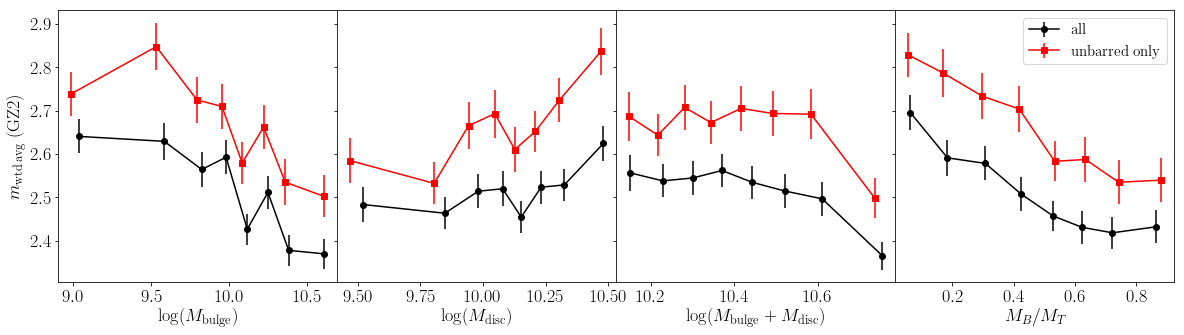

In [9]:
fig, axarr = bulge_disc_panels(sparcfire['m_wtd_avg'],spirals,color='k',marker='o',
                               ylabel='',label='all')

fig, axarr = bulge_disc_panels(sparcfire['m_wtd_avg'],unbarred_spirals,color='r',marker='s',
                               fig=fig,axarr=axarr,
                               ylabel='$m_\mathrm{wtd \, avg}$ (GZ2)',label='unbarred only')

axarr[-1].legend(fontsize=15)

#plt.savefig('figures/bd_vs_m.pdf')

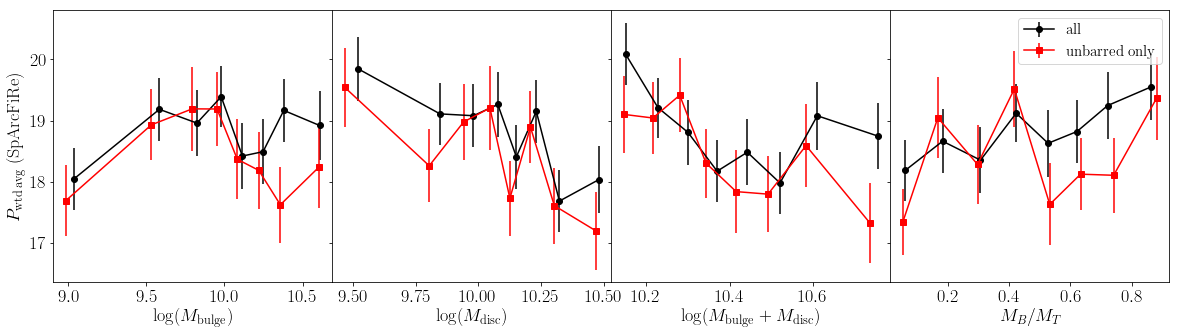

In [10]:
fig, axarr = bulge_disc_panels(sparcfire['P'],spirals,color='k',marker='o',
                               ylabel='',label='all')

fig, axarr = bulge_disc_panels(sparcfire['P'],unbarred_spirals,color='r',marker='s',
                               fig=fig,axarr=axarr,
                               ylabel='$P_\mathrm{wtd \, avg}$ (SpArcFiRe)',label='unbarred only')

axarr[-1].legend(fontsize=15)

#fig.savefig('figures/bd_vs_P.pdf')

#### Next: UV+MIR derived SFRs

In [11]:
sfrs = Table.read('../fits/SF_fits/sfrs.fits')

in_sfr = np.all([sfrs['F']>2,sfrs['w4']>2],axis=0)

sfr_spirals = np.all([in_sfr,spirals],axis=0)
sfr_unbarred_spirals = np.all([in_sfr,unbarred_spirals],axis=0)
print('{} spirals have UV+MIR detections!'.format(sfr_spirals.sum()))
print('+ {} unbarred have UV+MIR'.format(sfr_unbarred_spirals.sum()))

1107 spirals have UV+MIR detections!
+ 784 unbarred have UV+MIR


In [12]:
def sfr_panels(y,mask,fig=None,axarr=None,bins=8,equal_N=True,
               ylabel='y',xlabel=True,figlabel=None,
               **kwargs):
    if axarr is None:
        fig, axarr = plt.subplots(1,3,figsize=(10,3.3),
                                  sharey=True)
        fig.subplots_adjust(hspace=0,wspace=0)
    sfr_colnames = ['sfr_fuv','sfr_22','sfr_total']
    sfr_xlabels = ['$\log(SFR_\mathrm{FUV})$','$\log(SFR_\mathrm{22})$',
                  '$\log(SFR_\mathrm{FUV}+SFR_\mathrm{22})$']
    for a, ax in enumerate(axarr):
        sfr_data = sfrs[sfr_colnames[a]]
        _ = x_vs_y(sfr_data[mask],y[mask]).continuous_vs_continuous_binned(ax,bins,equal_N,
                                                                           **kwargs)
        if xlabel is True:
            ax.set_xlabel(sfr_xlabels[a])
    axarr[0].set_ylabel(ylabel)
    if figlabel is not None:
        axarr[-1].text(0.975,0.975,figlabel,
                       ha='right',va='top',transform=axarr[-1].transAxes)
    return fig, axarr

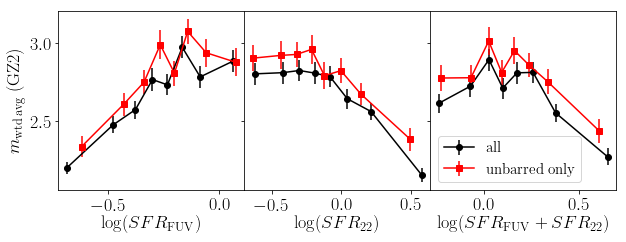

In [13]:
fig, axarr = sfr_panels(sparcfire['m_wtd_avg'],sfr_spirals,color='k',marker='o',
                        ylabel='',label='all')

fig, axarr = sfr_panels(sparcfire['m_wtd_avg'],sfr_unbarred_spirals,color='r',marker='s',
                        fig=fig,axarr=axarr,
                        ylabel='$m_\mathrm{wtd \, avg}$ (GZ2)',label='unbarred only')

axarr[-1].legend(fontsize=15)

#fig.savefig('figures/sfr_vs_m.pdf')

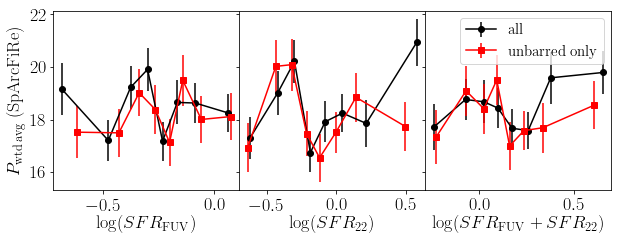

In [14]:
fig, axarr = sfr_panels(sparcfire['P'],sfr_spirals,color='k',marker='o',
                        ylabel='',label='all')

fig, axarr = sfr_panels(sparcfire['P'],sfr_unbarred_spirals,color='r',marker='s',
                        fig=fig,axarr=axarr,
                        ylabel='$P_\mathrm{wtd \, avg}$ (SpArcFiRe)',label='unbarred only')

axarr[-1].legend(fontsize=15)

#fig.savefig('figures/sfr_vs_P.pdf')

#### Finally: how do bars, arms and local density relate?

In [16]:
gz_data = Table.read('../fits/full_sample_debiased_w_low_z.fits')

sparcfire['logSigma'] = gz_data['IVAN_DENSITY']

In [17]:
from corner import corner

help(corner)

Help on function corner in module corner.corner:

corner(xs, bins=20, range=None, weights=None, color='k', smooth=None, smooth1d=None, labels=None, label_kwargs=None, show_titles=False, title_fmt='.2f', title_kwargs=None, truths=None, truth_color='#4682b4', scale_hist=False, quantiles=None, verbose=False, fig=None, max_n_ticks=5, top_ticks=False, use_math_text=False, hist_kwargs=None, **hist2d_kwargs)
    Make a *sick* corner plot showing the projections of a data set in a
    multi-dimensional space. kwargs are passed to hist2d() or used for
    `matplotlib` styling.
    
    Parameters
    ----------
    xs : array_like[nsamples, ndim]
        The samples. This should be a 1- or 2-dimensional array. For a 1-D
        array this results in a simple histogram. For a 2-D array, the zeroth
        axis is the list of samples and the next axis are the dimensions of
        the space.
    
    bins : int or array_like[ndim,]
        The number of bins to use in histograms, either as a fixe

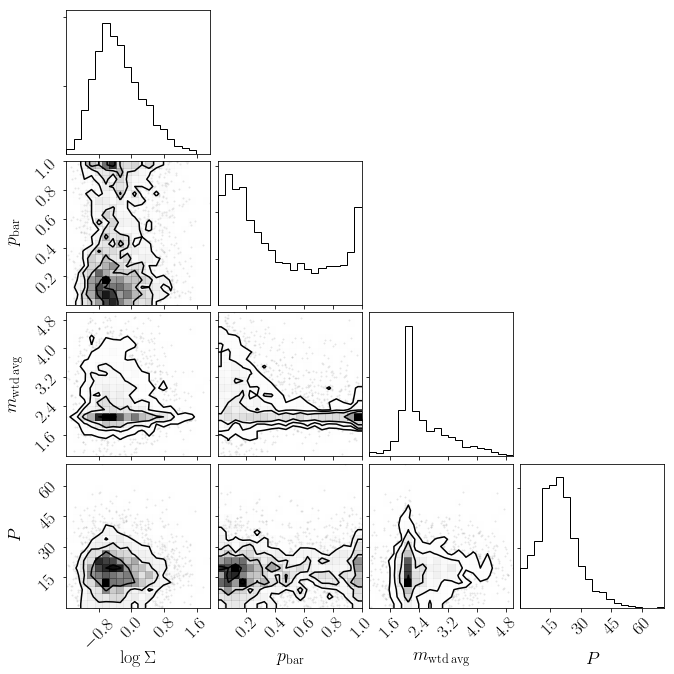

In [24]:
X = np.array([sparcfire['logSigma'],samples['p_bar'],sparcfire['m_wtd_avg'],sparcfire['P']]).T
labels = ['$\log \Sigma$','$p_\mathrm{bar}$','$m_\mathrm{wtd \, avg}$','$P$']

X_spirals = X[spirals]
X_unbarred_spirals = X[unbarred_spirals]

_ = corner(X_spirals,labels=labels)

In [25]:
import pca_analysis
import imp
imp.reload(pca_analysis)
from pca_analysis import pca_analysis

_ = pca_analysis(X_spirals,standardise=True,printout=True)

╒═════════════════╤════════╤════════╤════════╤════════╕
│ Variable        │   PCA1 │   PCA2 │   PCA3 │   PCA4 │
╞═════════════════╪════════╪════════╪════════╪════════╡
│ Exp. var. ratio │   0.34 │   0.25 │   0.24 │   0.16 │
├─────────────────┼────────┼────────┼────────┼────────┤
│ rho1            │  -0.3  │   0    │   0.94 │   0.03 │
├─────────────────┼────────┼────────┼────────┼────────┤
│ rho2            │  -0.8  │   0.08 │  -0.22 │   0.54 │
├─────────────────┼────────┼────────┼────────┼────────┤
│ rho3            │   0.75 │   0.13 │   0.17 │   0.47 │
├─────────────────┼────────┼────────┼────────┼────────┤
│ rho4            │  -0.03 │   0.99 │  -0.02 │  -0.1  │
╘═════════════════╧════════╧════════╧════════╧════════╛
